<a href="https://colab.research.google.com/github/Nakulpradeep94/Bike_Sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg                             
%matplotlib inline    
import seaborn as sns
from datetime import datetime
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

# Mounting drive

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading dataset

In [3]:
#reading file from the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Bike Sharing demand prediction/SeoulBikeData.csv', encoding = "ISO-8859-1")

# **Exploratory data analysis**

In [4]:
# to go through first 5 index of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#last 5 records of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#to get column or feature names of the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# to find data types of columns from the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#to find the number of elements in the dataset
df.size

122640

In [9]:
#to get the number of columns and rows in the given dataset
df.shape

(8760, 14)

We can see that there are 8760 rows for the given dataset and all the features or columns have 8760 non null values. hence we can deduce that there are no null values for the given dataset.However a proper and direct method is using isnull method which will be done a few steps later

In [10]:
#to get the summary statistics for numerical columns in our DataFrame
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# descriptive summary of all columns 
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [12]:
# To transpose data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Maximum number of bikes rented in an hour is 3556. The average count is 704.602055

In [13]:
#to check the number of  null values in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
#Checking if there are any null values in the dataframe
df.isnull().values.any()

False

We can see that there are no null values for the given dataset

In [15]:
df[df.duplicated()].shape

(0, 14)

We can see that there are no duplicated rows in the given dataset

In [16]:
#to get number of unique values for each of the feature
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

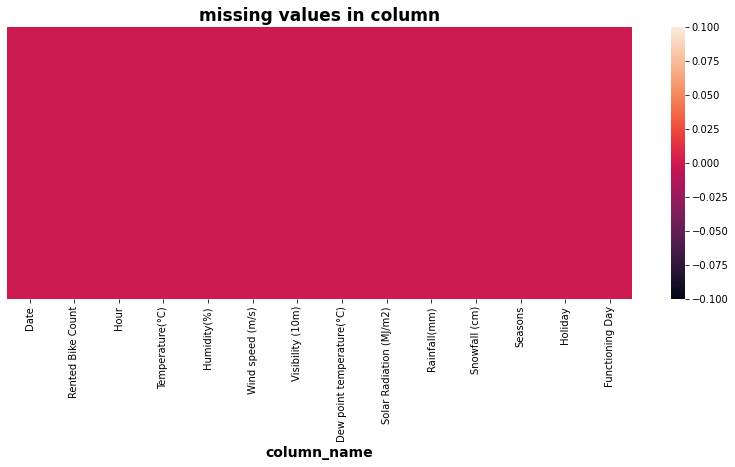

In [17]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [18]:
#to convert date from string to date format
df['Date']=df['Date'].apply(lambda x:datetime.strptime(x, '%d/%m/%Y'))

In [19]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [21]:
#Creating a feature showing year
df['Year']=df['Date'].apply(lambda x: x.year).astype('object')

coverting to string so that they will be considered as categorical

In [22]:
#Creating feature showing month
df['Month']=df['Date'].dt.month_name()

In [23]:
#Creating feature showing  day of week
df['day_of_week']=df['Date'].dt.day_name()

In [24]:
#new dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Analysis with respect to date

In [26]:
#dataframe with date and the total rented bike count
Date_df=df.groupby(['Date']).agg({"Date": "count","Rented Bike Count":"sum"}).sort_values(by=['Rented Bike Count'], ascending=False).rename(columns={'Date':'Count','Rented Bike Count':'Sum ofrentedbikes'})
Date_df.head()

,Count,Sum ofrentedbikes
Date,,
2018-06-13,24,36149
2018-06-19,24,35349
2018-06-08,24,35103
2018-06-20,24,34639
2018-06-21,24,34621


Maximum number of Bikes were rented on the Date: 13th June 2018 and the total number of bikes rented on that day is 36149. It was the day of korean byelection so the large number of bike rental could be because of that

In [27]:
Date_df.tail(15)

,Count,Sum ofrentedbikes
Date,,
2017-12-24,24,2014
2018-11-08,24,1721
2018-04-23,24,977
2018-11-09,24,0
2018-04-11,24,0
2018-10-02,24,0
2018-09-18,24,0
2018-11-03,24,0
2018-09-30,24,0


There are 12 days  in which no bikes where rented

In [28]:
# checking for dataframe where count is other than 24
Date_df[~Date_df['Count']==24]

,Count,Sum ofrentedbikes
Date,,


Implying total count of date is 24 for all the given dataset.The dates are from 01-12-2017 to to 30/11/2018 .This means that the 8760 records(rows) are the 24 records for each day in the one year duration (24 * 365 = 8760 )

In [29]:
Date_df[Date_df['Sum ofrentedbikes']==0]

,Count,Sum ofrentedbikes
Date,,
2018-11-09,24,0
2018-04-11,24,0
2018-10-02,24,0
2018-09-18,24,0
2018-11-03,24,0
2018-09-30,24,0
2018-09-28,24,0
2018-10-04,24,0
2018-09-19,24,0


In [30]:
merge_date_df=pd.merge(Date_df[Date_df['Sum ofrentedbikes']==0],df,how='left',on='Date')
merge_date_df

,Date,Count,Sum ofrentedbikes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,2018-11-09,24,0,0,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,Autumn,No Holiday,No,2018,November,Friday
1,2018-11-09,24,0,0,1,11.4,89,2.6,1376,9.6,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
2,2018-11-09,24,0,0,2,11.3,88,3.7,1680,9.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
3,2018-11-09,24,0,0,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,Autumn,No Holiday,No,2018,November,Friday
4,2018-11-09,24,0,0,4,10.6,75,3.2,913,6.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018-05-10,24,0,0,19,15.5,74,3.6,675,10.8,0.35,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
284,2018-05-10,24,0,0,20,13.6,82,2.1,520,10.5,0.02,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
285,2018-05-10,24,0,0,21,12.6,85,2.4,460,10.1,0.00,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
286,2018-05-10,24,0,0,22,12.3,85,2.3,452,9.8,0.00,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday


In [31]:
merge_date_df.shape

(288, 19)

In [32]:
merge_date_df[merge_date_df['Functioning Day']=='No']

,Date,Count,Sum ofrentedbikes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,2018-11-09,24,0,0,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,Autumn,No Holiday,No,2018,November,Friday
1,2018-11-09,24,0,0,1,11.4,89,2.6,1376,9.6,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
2,2018-11-09,24,0,0,2,11.3,88,3.7,1680,9.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
3,2018-11-09,24,0,0,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,Autumn,No Holiday,No,2018,November,Friday
4,2018-11-09,24,0,0,4,10.6,75,3.2,913,6.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,November,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018-05-10,24,0,0,19,15.5,74,3.6,675,10.8,0.35,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
284,2018-05-10,24,0,0,20,13.6,82,2.1,520,10.5,0.02,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
285,2018-05-10,24,0,0,21,12.6,85,2.4,460,10.1,0.00,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday
286,2018-05-10,24,0,0,22,12.3,85,2.3,452,9.8,0.00,0.0,0.0,Spring,No Holiday,No,2018,May,Thursday


We can see clearly that the days where there was zero rented bikes where non functioning days

In [33]:
#Understand the hour details of the datas
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [34]:
df['Hour'].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

In [35]:
#Checking for total number of bikes rented for each hours


In [36]:
df.groupby(['Hour'])['Rented Bike Count'].sum()

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

In [37]:
df['Rented Bike Count'].max()

3556

In [38]:
df[df['Rented Bike Count']>3400]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
4650,2018-06-12,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes,2018,June,Tuesday
4818,2018-06-19,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes,2018,June,Tuesday
4866,2018-06-21,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes,2018,June,Thursday


Text(0, 0.5, 'Total number of rental bikes')

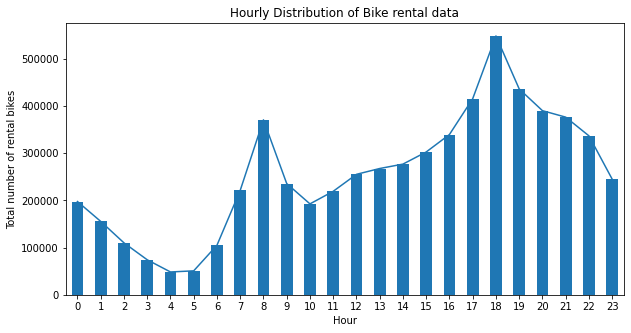

In [39]:
#Hourly distribution of the bike rental service rented count
df.groupby(['Hour'])['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
df.groupby(['Hour'])['Rented Bike Count'].sum().plot()
plt.title("Hourly Distribution of Bike rental data")
plt.ylabel("Total number of rental bikes")

Bike demand is maximum between 17th hour to 19th hour ie between 5pm to 7pm.

Text(0, 0.5, 'Total number of rental bikes')

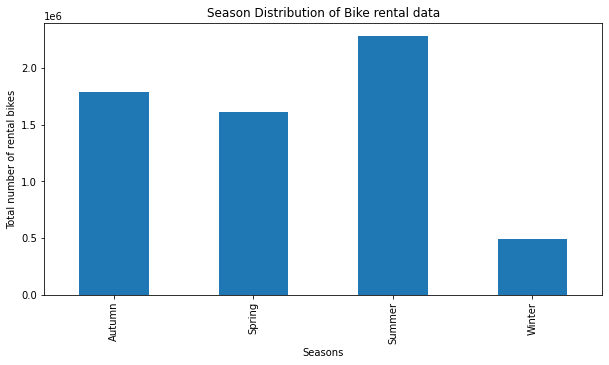

In [40]:
# Seasonal distribution of the bike rental service rented count
df.groupby(['Seasons'])['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
plt.title("Season Distribution of Bike rental data")
plt.ylabel("Total number of rental bikes")

People use rental bikes most during Summer and least during Winter

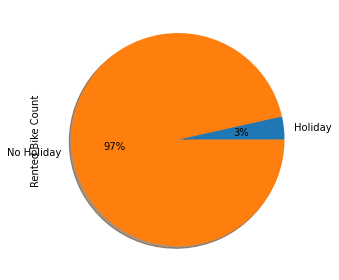

In [41]:
#Total number of bikes rent based on holiday ----pie chart
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(autopct='%.0f%%',shadow=True)
plt.tight_layout()


It is clear from the pie chart that people use rental bikes rarely on holidays

<Figure size 4000x1600 with 0 Axes>

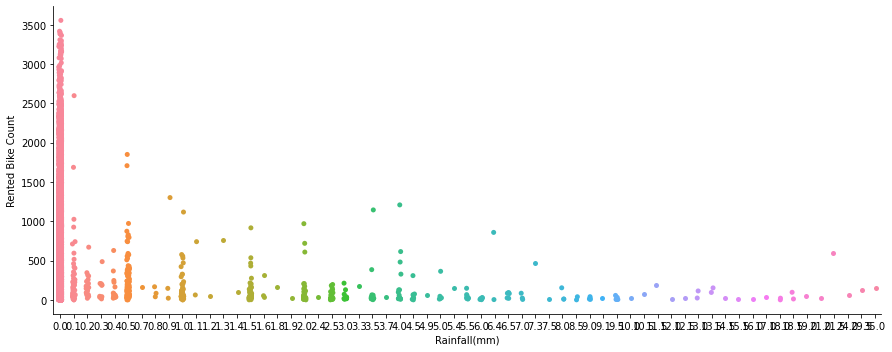

In [42]:
#Rented bikes in relation with rainfall
plt.figure(figsize=(20,8),dpi=200)
sns.catplot(x="Rainfall(mm)",y="Rented Bike Count",data=df, height=5,aspect=2.5)


It is clear from the above categorical plot thatmaximum bike rentals takes place when there is zero or minimum rainfall

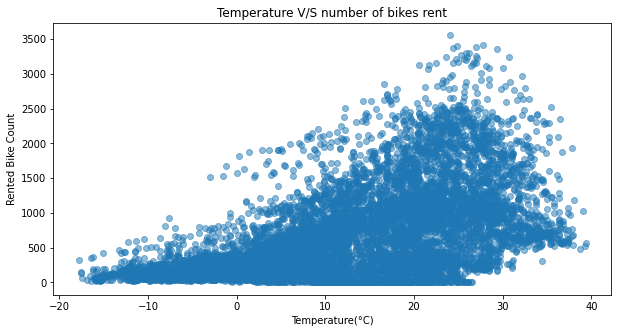

In [43]:
#Using the scatterplot to understand the temperature impact on rented bike count
plt.figure(figsize=(10,5))
plt.scatter(df['Temperature(°C)'],df['Rented Bike Count'], alpha=0.5)
plt.title('Temperature V/S number of bikes rent')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

From the scatterplot it is clear that when temperature is high then rental bike count is high.Also we found out that summer is favourable for high bike rentals and temperature is high during summer

<Figure size 4000x1600 with 0 Axes>

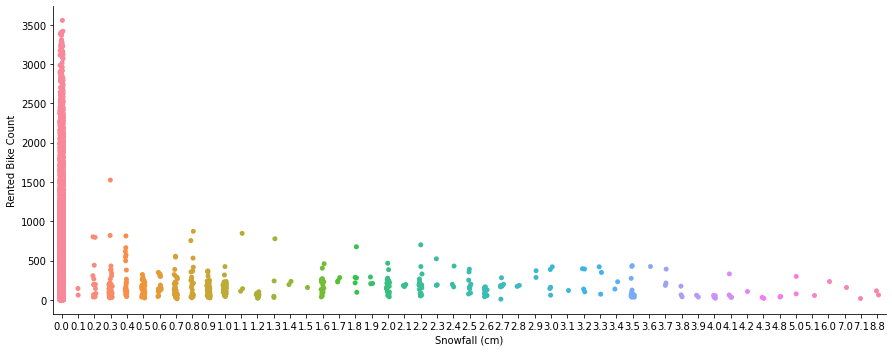

In [44]:
#Rented bikes in relation with Snowfall
plt.figure(figsize=(20,8),dpi=200)
sns.catplot(x="Snowfall (cm)",y="Rented Bike Count",data=df, height=5,aspect=2.5)

<Figure size 4000x1600 with 0 Axes>

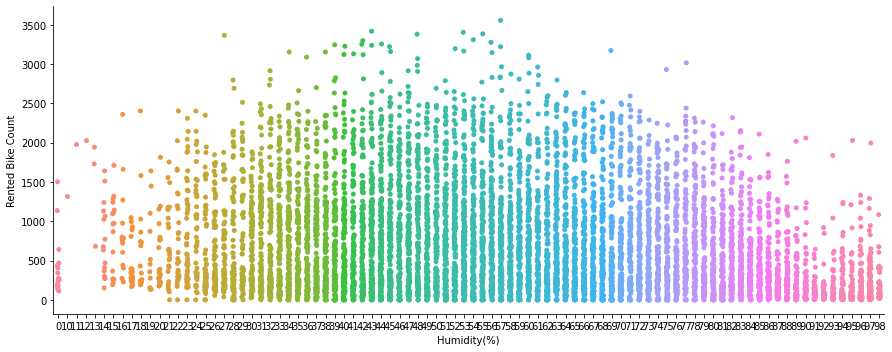

In [45]:
#Rented bikes in relation with Snowfall
plt.figure(figsize=(20,8),dpi=200)
sns.catplot(x="Humidity(%)",y="Rented Bike Count",data=df, height=5,aspect=2.5)

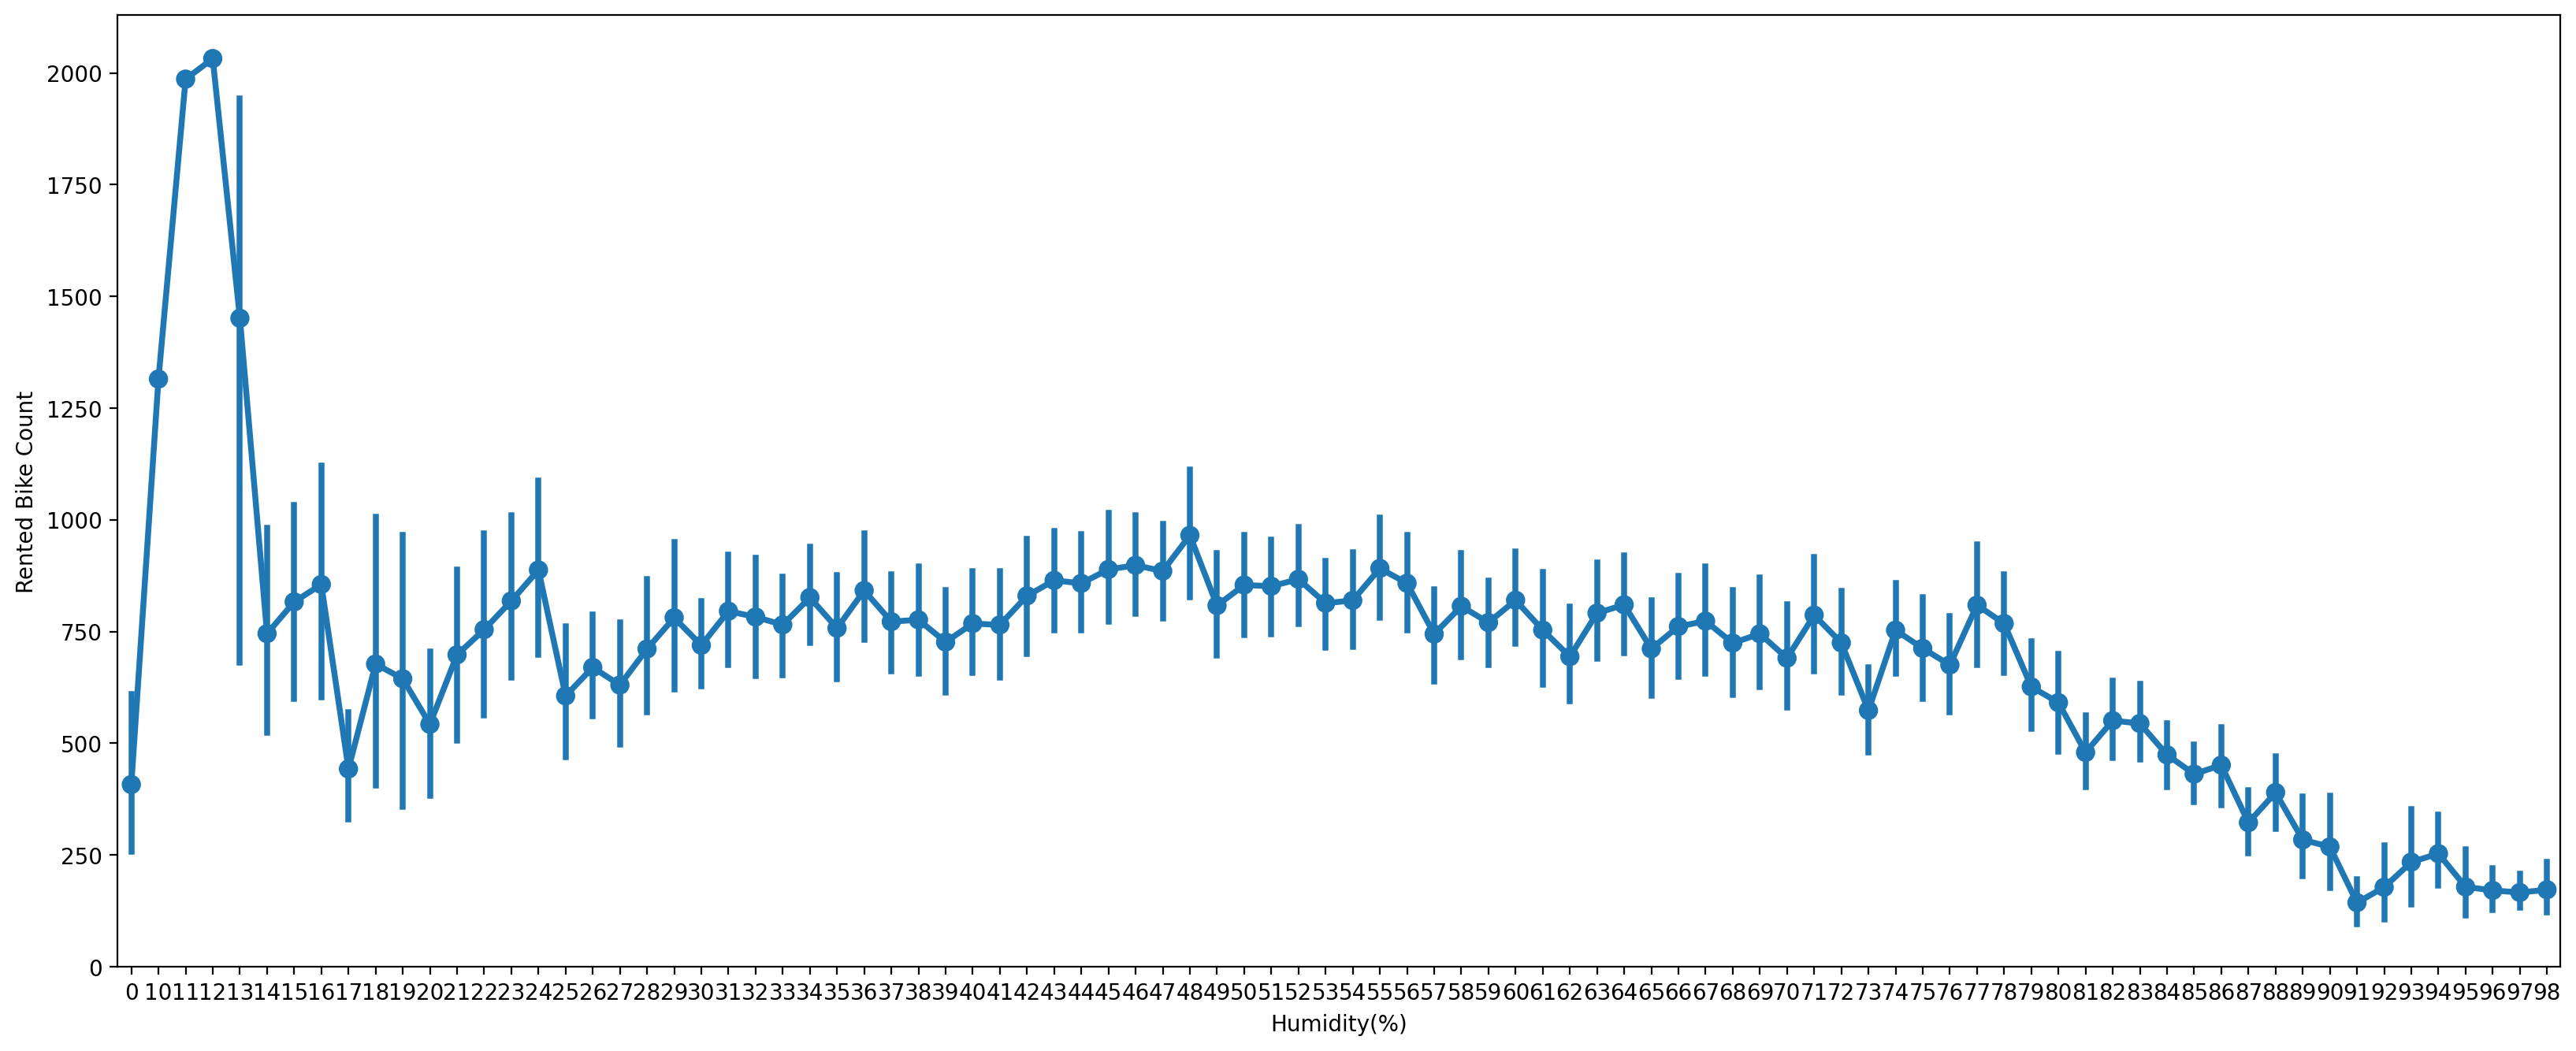

In [46]:
#Rented bikes in relation with Humidity
plt.figure(figsize=(20,8),dpi=200)
sns.pointplot(x="Humidity(%)",y="Rented Bike Count",data=df)

As humidity increases the bike rental reduces

wind ,solar,visibility left to do

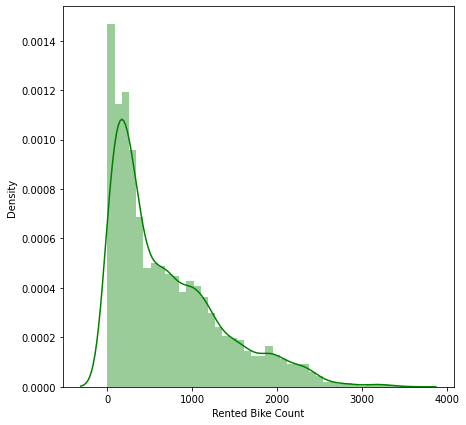

In [47]:
# Dependent variable 'REnted bike count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="g")

In [48]:
df['Rented Bike Count'].skew()

1.1534281773679014

In [49]:
np.log10(df['Rented Bike Count']).skew()

nan

In [50]:
np.sqrt(df['Rented Bike Count']).skew()

0.237362090985412

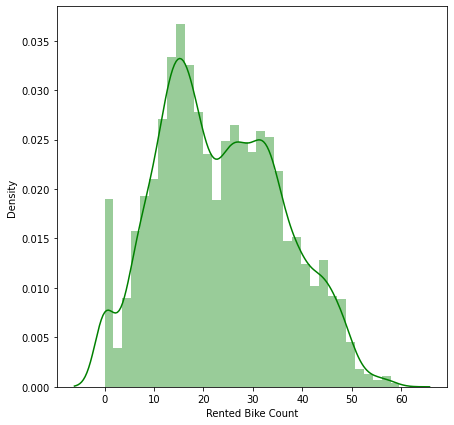

In [51]:
#square root transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="g")

skewness of the dependent variable is reduced by the sqrt transformation better

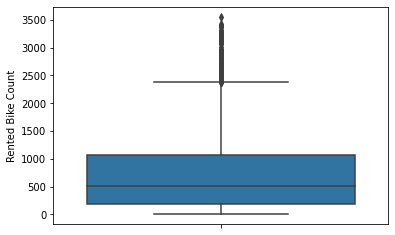

In [52]:
#Finding outliers in the dependent variable
sns.boxplot(data=df,  y='Rented Bike Count')

It is clear that there is presence of outlier for the dependent variable,however the outlier distribution is continous.so need to treat them,we can reduce their impact by scaling them(data transformation) 

In [53]:
#dropping date column as we have extracted all e want from it
df.drop(['Date'],axis=1,inplace=True)

In [54]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


Remember hour column is numerical but actually they are categorical.so need to convert it to categorical by transformation

In [55]:
# defining a function for distribute hour column
def hour(x):
  if x >= 16 and x <= 20:
    return 'Evening'
  elif x>= 6 and x <= 10:
    return 'Morning'
  elif x >= 11 and x <= 15:
    return 'Noon'
  else :
    return 'Night'     

In [56]:
#applying hour function on Hour column
df['Hour']=df['Hour'].apply(hour)

In [57]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


In [58]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'day_of_week'],
      dtype='object')

In [59]:
df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [60]:
numeric_features =df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

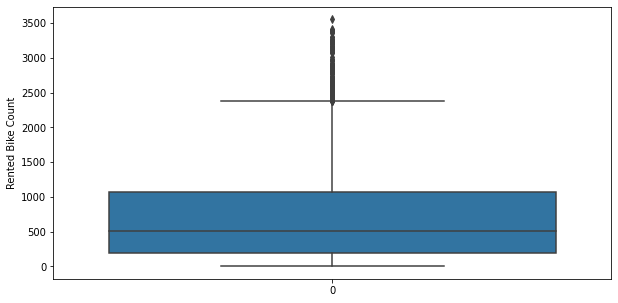

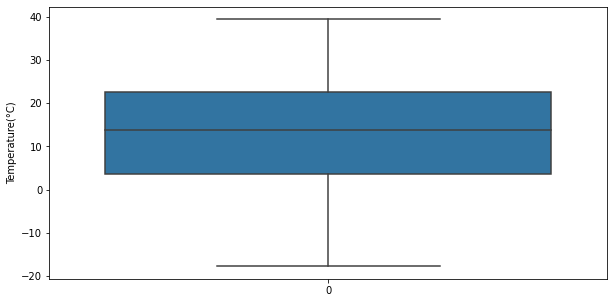

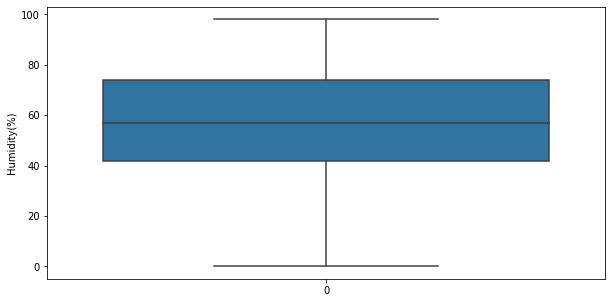

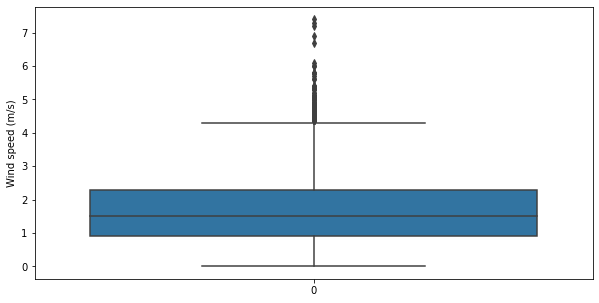

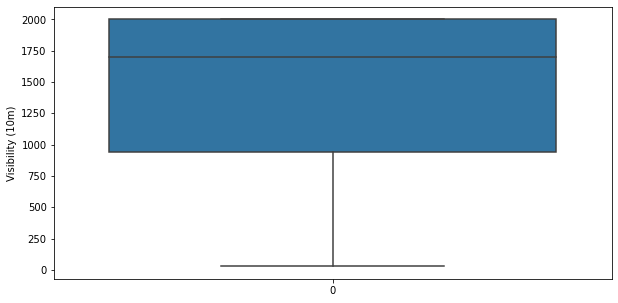

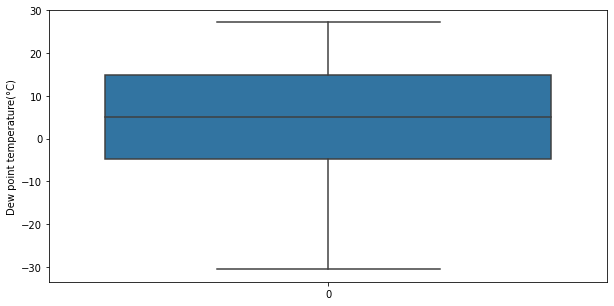

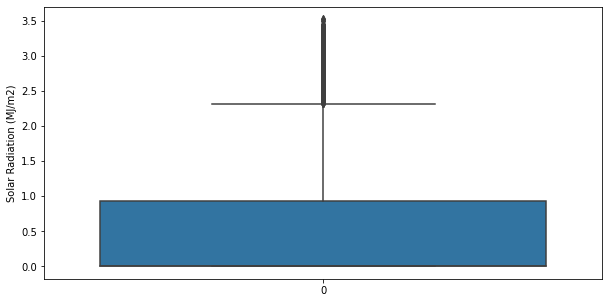

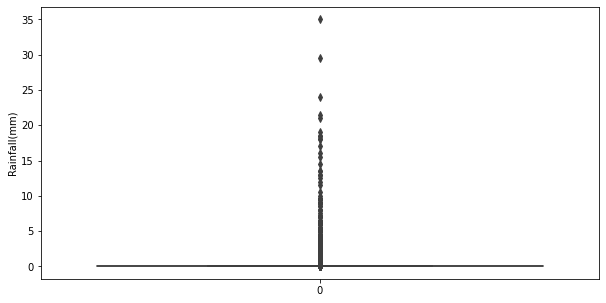

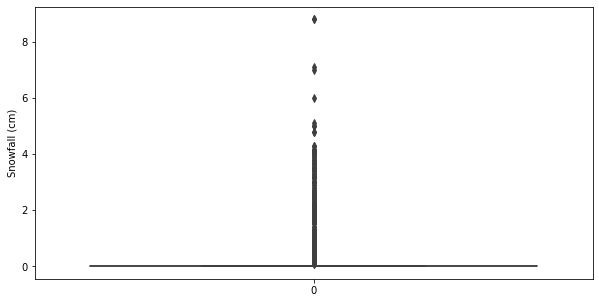

In [61]:
for i in numeric_features:
  plt.figure(figsize = (10,5))
  sns.boxplot(data=df[i])
  plt.ylabel(i)
  plt.show()
  

There is presence of  outliers on Snowfall and Rainfall data,however their significance is checked by checking that particular data

In [62]:
#checking significance of outlier data
df[df['Snowfall (cm)']>4]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
224,35,Morning,-0.2,90,1.2,378,-1.6,0.00,0.0,4.1,Winter,No Holiday,Yes,2017,December,Sunday
225,31,Morning,0.2,90,1.0,305,-1.2,0.00,1.6,4.3,Winter,No Holiday,Yes,2017,December,Sunday
226,19,Morning,0.5,91,0.4,143,-0.8,0.00,0.0,4.3,Winter,No Holiday,Yes,2017,December,Sunday
418,36,Morning,-3.7,87,1.0,541,-5.5,0.03,0.0,4.8,Winter,No Holiday,Yes,2017,December,Monday
419,44,Noon,-2.9,85,1.2,243,-5.0,0.06,0.0,4.8,Winter,No Holiday,Yes,2017,December,Monday
420,62,Noon,-1.8,83,1.2,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes,2017,December,Monday
421,76,Noon,-0.9,84,1.2,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,Yes,2017,December,Monday
422,116,Noon,0.5,76,0.9,364,-3.2,0.17,0.0,4.2,Winter,No Holiday,Yes,2017,December,Monday
2018,62,Night,0.7,97,1.4,197,0.2,0.00,0.0,4.1,Winter,No Holiday,Yes,2018,February,Friday
2019,32,Night,0.9,97,1.2,243,0.4,0.00,3.7,4.1,Winter,No Holiday,Yes,2018,February,Friday


on checking outlier snowfall data i couldnt find any reason for removing or modifying data



In [63]:
#checking significance of outlier data
df[df['Rainfall(mm)']>20]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
3997,151,Noon,21.8,97,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes,2018,May,Wednesday
5034,596,Evening,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,2018,June,Thursday
5132,61,Evening,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,2018,July,Monday
6501,122,Night,22.9,98,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes,2018,August,Tuesday
6524,19,Evening,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,2018,August,Wednesday


after analysis it is clear that the index 5034 is an outlier as rented bike is way too high for rainfall of 21.5mm  also significant is that at this point the humidity is also very high

In [64]:
#checking for data authenticity by checking for the data on the particular day
#df[df['Date']=='2018-06-28']

In [65]:
#removing the particular value
#df.drop(5034,axis=0,inplace=True)

In [66]:
#To confirm the particular value is removed
#df[df['Rainfall(mm)']>20]

In [67]:
df.shape

(8760, 16)

In [68]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'day_of_week'],
      dtype='object')

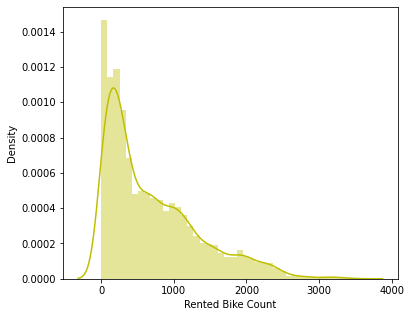

The skew is 1.1534281773679014
____________________________________________________________________________________________________


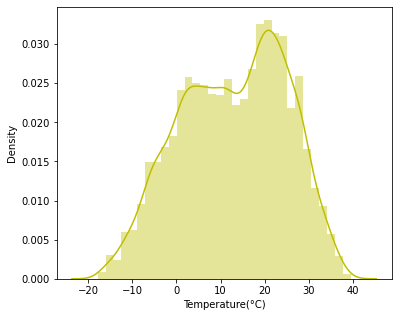

The skew is -0.19832553450003293
____________________________________________________________________________________________________


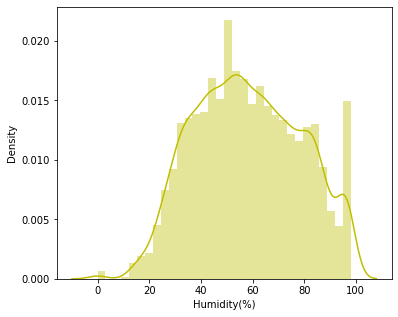

The skew is 0.05957897257708239
____________________________________________________________________________________________________


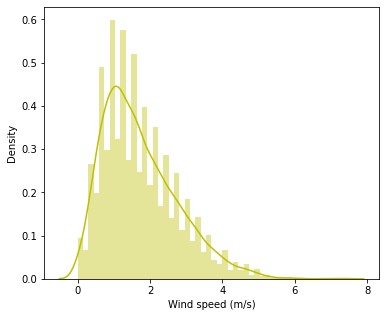

The skew is 0.8909547980299266
____________________________________________________________________________________________________


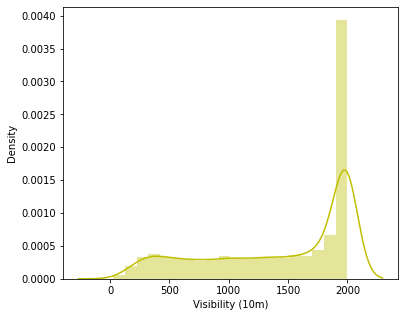

The skew is -0.7017864489502947
____________________________________________________________________________________________________


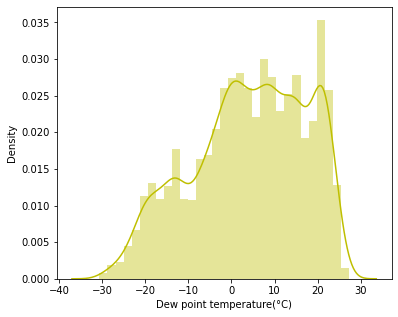

The skew is -0.3672984396624286
____________________________________________________________________________________________________


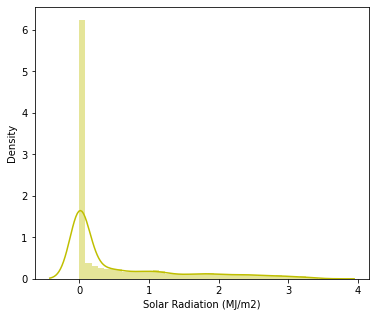

The skew is 1.5040397173602802
____________________________________________________________________________________________________


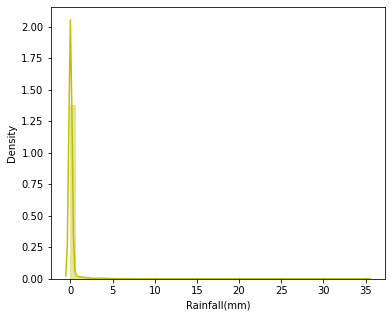

The skew is 14.533232242546704
____________________________________________________________________________________________________


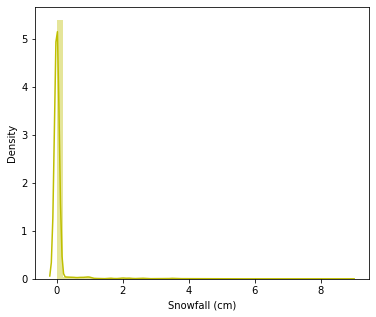

The skew is 8.440800781484777
____________________________________________________________________________________________________


In [69]:

for i in numeric_features:
  plt.figure(figsize = (6,5))
  sns.distplot(df[i],color="y")
  #plt.ylabel(i)
  plt.show()
  print("The skew is",df[i].skew())
  print('__'*50)



1.  Rented Bike Count, windspeed, solar radiation, rainfall and snowfall are positively skewed
2.   Temperature and humidity is uniformly distributed
3. Visibility and dewpoint temperature is negatively skewed 




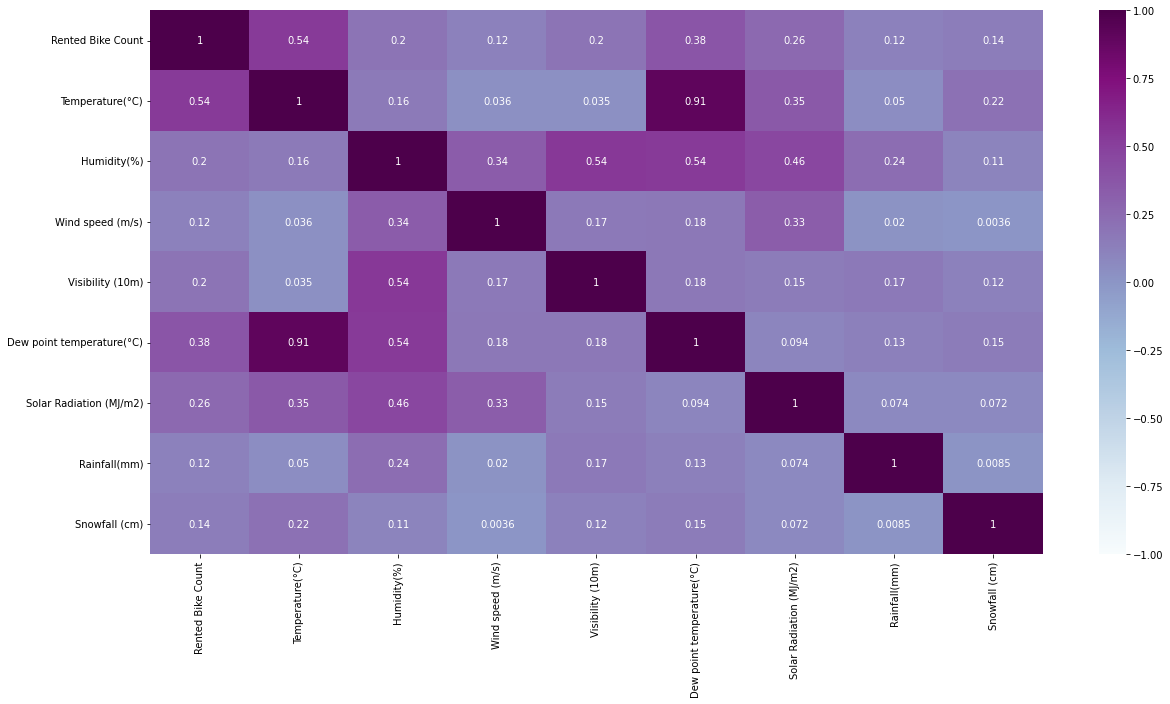

In [70]:
#to find correlation heatmap to get a better visual output
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()), vmin=-1, cmap='BuPu', annot=True)



*   Temperature and dew point temperature are highly correlated. ie (0.91).Possible multicollinearity
*   



Checking for relationship between dependent and independent variable

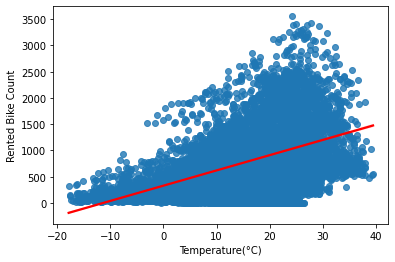

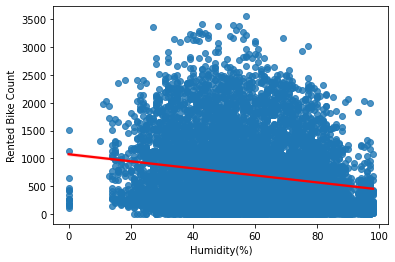

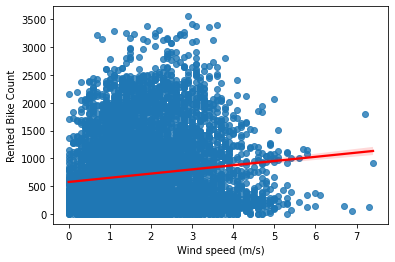

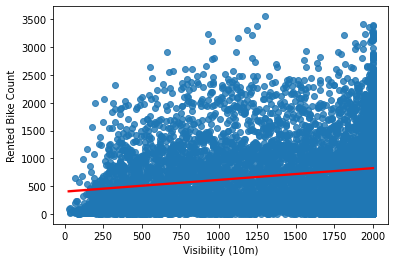

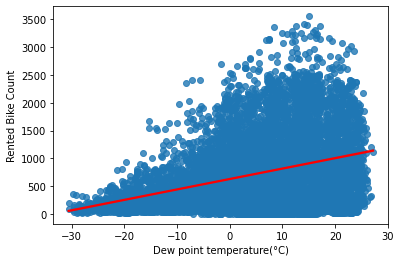

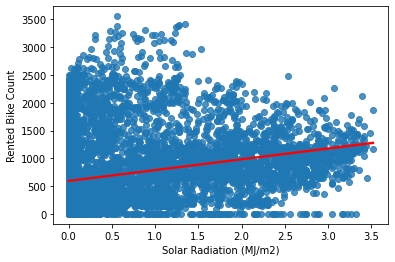

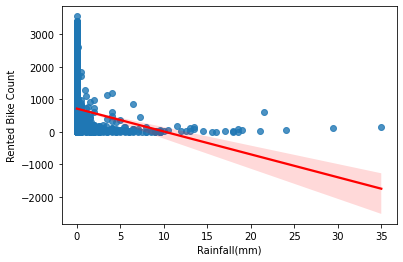

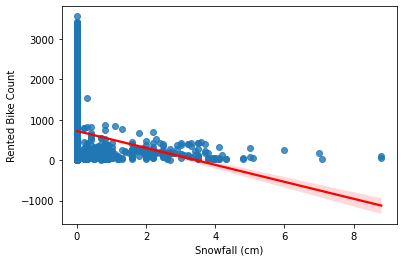

In [71]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  plt.show()


In [72]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

In [73]:
#Multicollinearity(to remove others we can use VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [74]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


In [75]:
# Dropping dew point temperature column due to high multicollinearity
#df.drop(['Dew point temperature(°C)'], axis = 1,inplace=True)

Year is having high vif so need to remove it before doing linear regression

In [76]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


Now they dont have high vif ie vif>10

In [77]:
new_df=df.copy()

In [78]:
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,day_of_week
0,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


we will be doing hot encoding as there is no relationship with numbers fuel have ie it wouldnt be nice to give different numerical values like in a label encoding(as it may give false priority).

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
final_df=pd.get_dummies(new_df,drop_first = True) 

drop_first given so that the categorical variables wont have multicollinearity ie to avoid dummy trap

In [81]:
final_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_Morning,Hour_Night,Hour_Noon,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Year_2018,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
#plt.figure(figsize=(18,8))

#sns.heatmap(abs(final_df.corr()), annot=True, cmap='YlGnBu')

In [83]:
#calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Rented Bike Count']]])

In [84]:
#calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Rented Bike Count','Functioning Day_Yes','Holiday_No Holiday','Humidity(%)']]])

After removing features having multicollinearity  we have vif <10 for all  remaining

In [85]:
final_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Hour_Morning', 'Hour_Night', 'Hour_Noon', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Year_2018', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

# **Data preparation**

In [86]:
# Create the independent variable data
X = final_df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis=1)
# Create the dependent variable data
y = np.sqrt(final_df['Rented Bike Count'])

In [87]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [88]:
#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 33)
(6570,)
(2190, 33)
(2190,)


Transforming X train X test using yeojohnson transformation

In [89]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer(method='yeo-johnson')
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

doing yeojohnson as minmaxscaler is affected by outliers and standardscaler is used for normal distribution and boxcox transformation  data has to be strictly positive

In [90]:
#Function for printing the evaluation metrics of each of the predictive models
def print_metric(model_name,y_test,y_pred):
  print(model_name + ' Evaluation Metrics')
  print('MAE:', mean_absolute_error(y_test, y_pred))
  print('MSE:', mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('R2:', r2_score(y_test, y_pred))

In [91]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "MAE", "MSE","RMSE","R2"]
metrics_df = pd.DataFrame(columns = column_names) 

# **LINEAR REGRESSION**

In [92]:
# Fitting Linear Regression to the Training set
lin_reg = LinearRegression()
lin_reg.fit(X_train_trans, y_train)

LinearRegression()

In [93]:
lin_reg.coef_

array([ 7.05409441e+00, -1.81846248e+00,  4.86866164e-01,  7.46137932e-01,
        1.29419035e-01, -3.05542527e+00,  1.47252928e-01, -1.65054152e+00,
       -3.57964975e+00, -2.90062956e+00,  1.47620597e+12,  2.74503655e+12,
       -1.72098849e+12,  6.96064572e-01,  5.09690836e+00, -3.50353973e+12,
       -8.16632957e+11, -1.44485188e+12,  1.96351808e+12,  2.07532481e+12,
       -8.19324815e+11, -8.04358551e+11, -4.04282090e-01,  5.44578911e-01,
        9.48400093e+11,  9.47630227e+11,  9.26492899e+11, -4.67477882e-01,
       -5.14269900e-01, -1.00398630e+00, -3.44222180e-01, -2.99427343e-01,
       -2.22072944e-01])

In [94]:
y_pred = lin_reg.predict(X_test_trans)

In [95]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Linear Regression', 'MAE':mean_absolute_error(y_test**2, y_pred**2), 'MSE':mean_squared_error(y_test**2, y_pred**2), 'RMSE':np.sqrt(mean_squared_error(y_test**2, y_pred**2)), 'R2':r2_score(y_test**2, y_pred**2)}, ignore_index=True)
print_metric("Linear Regression",y_test**2,y_pred**2)

Linear Regression Evaluation Metrics
MAE: 270.6345325668483
MSE: 156629.86615856548
RMSE: 395.7649127431151
R2: 0.6244876369221979


# **LASSO REGRESSION**

In [96]:
# Fitting Lasso Regression to the Training set
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]} #lasso parameters 
lasso_cv = GridSearchCV(estimator=lasso,param_grid =parameters,scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_trans, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [97]:
lasso_cv.fit(X_train_trans,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [98]:
lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [99]:
lasso_cv.best_params_

{'alpha': 0.001}

In [100]:
lasso_cv_best = lasso_cv.best_estimator_

In [101]:
y_pred =lasso_cv_best.predict(X_test_trans)

In [102]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Lasso Regression', 'MAE':mean_absolute_error(y_test**2, y_pred**2), 'MSE':mean_squared_error(y_test**2, y_pred**2),'RMSE':np.sqrt(mean_squared_error(y_test**2, y_pred**2)), 'R2':r2_score(y_test**2, y_pred**2)}, ignore_index=True)
print_metric("Lasso Regression",y_test**2,y_pred**2)

Lasso Regression Evaluation Metrics
MAE: 270.65575724761385
MSE: 156651.21269876827
RMSE: 395.79188053668844
R2: 0.6244364596470607


# **RIDGE REGRESSION**

In [103]:
# Fitting Ridge Regression to the Training set
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_cv = GridSearchCV(estimator=ridge,param_grid =parameters,scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_trans,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [104]:
ridge_cv.best_estimator_

Ridge(alpha=5)

In [105]:
ridge_cv.best_params_

{'alpha': 5}

In [106]:
ridge_cv_best = ridge_cv.best_estimator_

In [107]:
y_pred=ridge_cv_best.predict(X_test_trans)

In [108]:
metrics_df=metrics_df.append({'MODEL NAME': 'Ridge Regression', 'MAE':mean_absolute_error(y_test**2, y_pred**2), 'MSE':mean_squared_error(y_test**2, y_pred**2), 'RMSE':np.sqrt(mean_squared_error(y_test**2, y_pred**2)), 'R2':r2_score(y_test**2, y_pred**2)}, ignore_index=True)
print_metric("Ridge Regression",y_test**2,y_pred**2)

Ridge Regression Evaluation Metrics
MAE: 270.6685226121456
MSE: 156670.93051961414
RMSE: 395.81678908254275
R2: 0.6243891871460865


# **ELASTICNET REGRESSiON**

In [109]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
# finding the best parameters for elasticnet  model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_cv = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

In [110]:
elastic_cv.fit(X_train_trans,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [111]:
elastic_cv.best_estimator_

ElasticNet(alpha=0.001)

In [112]:
elastic_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.5}

In [113]:
elastic_cv_best = elastic_cv.best_estimator_

In [114]:
y_pred=elastic_cv_best.predict(X_test_trans)

In [115]:
metrics_df=metrics_df.append({'MODEL NAME': 'Elasticnet Regression', 'MAE':mean_absolute_error(y_test**2, y_pred**2), 'MSE':mean_squared_error(y_test**2, y_pred**2), 'RMSE':np.sqrt(mean_squared_error(y_test**2, y_pred**2)), 'R2':r2_score(y_test**2, y_pred**2)}, ignore_index=True)
print_metric("Elasticnet Regression",y_test**2,y_pred**2)

Elasticnet Regression Evaluation Metrics
MAE: 270.66803547171514
MSE: 156667.61219435037
RMSE: 395.8125973163946
R2: 0.6243971426669065


# Polynomial regression

In [116]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [117]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train_trans) # fit the train set
poly_X_test = poly.transform(X_test_trans) #transform the test set

In [118]:
lin_reg = LinearRegression()
lin_reg.fit(poly_X_train, y_train)

LinearRegression()

In [119]:
y_pred = lin_reg.predict(poly_X_test)

In [120]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'poly Regression', 'MAE':mean_absolute_error(y_test**2, y_pred**2), 'MSE':mean_squared_error(y_test**2, y_pred**2),'RMSE':np.sqrt(mean_squared_error(y_test**2, y_pred**2)), 'R2':r2_score(y_test**2, y_pred**2)}, ignore_index=True)
print_metric("Poly Regression",y_test**2,y_pred**2)

Poly Regression Evaluation Metrics
MAE: 209.9871181221041
MSE: 103284.32262271189
RMSE: 321.378783715901
R2: 0.7523809410800313


For tree based methods

In [220]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [221]:
#vcreating y for dependent variable
y=final_df['Rented Bike Count']

In [323]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **KNN**

In [223]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [224]:
scaler = MinMaxScaler()

In [225]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [226]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

In [227]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1)

In [228]:
y_pred=knn_model.predict(X_test_scaled)

In [229]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'KNN', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("KNN",y_test,y_pred)

KNN Evaluation Metrics
MAE: 250.76792237442925
MSE: 135721.14970319634
RMSE: 368.40351478127394
R2: 0.6757136808208428


KNN standard

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
scaler = StandardScaler()

In [232]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [234]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

In [235]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1)

In [236]:
y_pred=knn_model.predict(X_test_scaled)

In [237]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'KNN', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("KNN",y_test,y_pred)

KNN Evaluation Metrics
MAE: 241.72671232876712
MSE: 132358.4808675799
RMSE: 363.811051052026
R2: 0.6837482981351319


knn-yeojohnson

In [238]:
yeo = PowerTransformer(method='yeo-johnson')

In [239]:
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

In [240]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

In [241]:
knn_model.fit(X_train_trans,y_train)

KNeighborsRegressor(n_jobs=-1)

In [242]:
y_pred=knn_model.predict(X_test_trans)

In [243]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'KNN', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("KNN",y_test,y_pred)

KNN Evaluation Metrics
MAE: 238.22043378995434
MSE: 131696.79079908677
RMSE: 362.90052466080397
R2: 0.685329312127559


standard scaler transformation is giving better accuracy

# **Decision Tree**

In [244]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [245]:
dt=DecisionTreeRegressor()

In [246]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [247]:
y_pred=dt.predict(X_test)

In [248]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Decision Tree', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Decision Tree",y_test,y_pred)

Decision Tree Evaluation Metrics
MAE: 241.83618721461187
MSE: 164693.45947488584
RMSE: 405.8244195152453
R2: 0.6064884811041753


# **Gradient Boosting**

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [250]:
# Fitting Gradient Boosting Regression to the Training set
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [251]:
y_pred=gb.predict(X_test)

In [252]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Gradient Boosting', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Gradient Boosting",y_test,y_pred)

Gradient Boosting Evaluation Metrics
MAE: 247.43702120640447
MSE: 123585.38339288038
RMSE: 351.5471282671505
R2: 0.7047103625892859


# **Xg boost**



In [253]:
#importing the libraries
from xgboost import XGBRegressor

xg_boost = XGBRegressor()
xg_boost.fit(X_train,y_train)

[14:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [254]:
y_pred = xg_boost.predict(X_test)

In [255]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost",y_test,y_pred)

XGBoost Evaluation Metrics
MAE: 246.79336886454934
MSE: 122973.94528750158
RMSE: 350.67641107936186
R2: 0.706171306687039


# **Random Forest**

In [256]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [257]:
# Fitting Random Forest to the Training set
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [258]:
y_pred=rf_regressor.predict(X_test)

In [259]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Evaluation Metrics
MAE: 180.9081506849315
MSE: 80003.3633247717
RMSE: 282.8486579865135
R2: 0.8088433801859256


# **AdaBoostRegressor**

In [260]:
from sklearn.ensemble import AdaBoostRegressor


In [261]:
ab_regressor = AdaBoostRegressor()

In [262]:
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor()

In [263]:
y_pred=ab_regressor.predict(X_test)

In [264]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Evaluation Metrics
MAE: 447.1373624246857
MSE: 266327.97292674717
RMSE: 516.0697364957058
R2: 0.3636473149267241


# **Bagging Regressor**

In [265]:
from sklearn.ensemble import BaggingRegressor

In [266]:
b_regressor=BaggingRegressor()

In [267]:
b_regressor.fit(X_train,y_train)

BaggingRegressor()

In [268]:
y_pred=b_regressor.predict(X_test)

In [269]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Evaluation Metrics
MAE: 190.36866438356162
MSE: 90497.5647545662
RMSE: 300.8281315877327
R2: 0.7837689834405777


# **CATBOOST**

In [150]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [270]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [271]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)

In [272]:
cb_model.fit(X_train,y_train)

In [273]:
y_pred=cb_model.predict(X_test)

In [274]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Evaluation Metrics
MAE: 194.21189474571187
MSE: 81362.2430501799
RMSE: 285.24067565860923
R2: 0.8055965310004929


# **light GBM**

In [275]:
import lightgbm as lgb

In [276]:
lgbr=lgb.LGBMRegressor()

In [277]:
lgbr.fit(X_train,y_train)

LGBMRegressor()

In [278]:
y_pred=lgbr.predict(X_test)

In [279]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Evaluation Metrics
MAE: 193.56314890867995
MSE: 83580.02225684821
RMSE: 289.10209659711603
R2: 0.800297464073523


# **random forest gridcv**

In [281]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [309]:
# Hyperparameter Tuning
param_dict = {'n_estimators' : [50,100,125],
              'max_depth' : [15,20,25,40,30,50],
              'min_samples_split' : [2,10,50,100],
              'min_samples_leaf' : [2,15,30,40]}


param_dict

{'n_estimators': [50, 100, 125],
 'max_depth': [15, 20, 25, 40, 30, 50],
 'min_samples_split': [2, 10, 50, 100],
 'min_samples_leaf': [2, 15, 30, 40]}

In [310]:
from sklearn.model_selection import GridSearchCV

rf_regressor_gridcv = GridSearchCV(estimator=rf_regressor,
                       param_grid = param_dict,
                       cv = 4, verbose=2)

In [311]:
rf_regressor_gridcv.fit(X_train,y_train)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=125; total time=   3.1s
[CV] END max_depth=15, min_samp

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 40, 30, 50],
                         'min_samples_leaf': [2, 15, 30, 40],
                         'min_samples_split': [2, 10, 50, 100],
                         'n_estimators': [50, 100, 125]},
             verbose=2)

In [312]:
rf_regressor_gridcv.best_params_

{'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [313]:
rf_regressor_gridcv.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_leaf=2, n_estimators=125)

In [314]:
rf_regressor_gridcv_best = rf_regressor_gridcv.best_estimator_

In [315]:
y_pred = rf_regressor_gridcv_best.predict(X_test)

In [316]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'RandomForest- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("RandomForest- GridSearchCV",y_test,y_pred)

RandomForest- GridSearchCV Evaluation Metrics
MAE: 183.36298906695788
MSE: 81620.08820786726
RMSE: 285.6922963747312
R2: 0.8049804467918971


random forest with standard

In [331]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Hyperparameter Tuning
param_dict = {'n_estimators' : [50,100,125],
              'max_depth' : [15,20,25,40,30,50],
              'min_samples_split' : [2,10,50,100],
              'min_samples_leaf' : [2,15,30,40]}


param_dict


from sklearn.model_selection import GridSearchCV

rf_regressor_gridcv = GridSearchCV(estimator=rf_regressor,
                       param_grid = param_dict,
                       cv = 4, verbose=2)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

In [332]:
rf_regressor_gridcv.fit(X_train,y_train)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=125; total time=   3.0s
[CV] END max_depth=15, min_samp

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 40, 30, 50],
                         'min_samples_leaf': [2, 15, 30, 40],
                         'min_samples_split': [2, 10, 50, 100],
                         'n_estimators': [50, 100, 125]},
             verbose=2)

In [333]:
rf_regressor_gridcv.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=125)

In [334]:
rf_regressor_gridcv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [335]:
rf_regressor_gridcv_best=rf_regressor_gridcv.best_estimator_

In [336]:
y_pred = rf_regressor_gridcv_best.predict(X_test)

In [337]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'RandomForest- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("RandomForest- GridSearchCV",y_test,y_pred)

RandomForest- GridSearchCV Evaluation Metrics
MAE: 183.2310823643632
MSE: 81943.30184218992
RMSE: 286.2574048687473
R2: 0.8042081739367657


run the one above again

randomforest chechi

In [324]:
rf_gridcv = GridSearchCV(estimator=rf_regressor,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=15, min_sampl

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 40, 30, 50],
                         'min_samples_leaf': [2, 15, 30, 40],
                         'min_samples_split': [2, 10, 50, 100],
                         'n_estimators': [50, 100, 125]},
             verbose=2)

In [326]:
rf_gridcv.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=2, n_estimators=125)

In [327]:
rf_gridcv.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [328]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [329]:
y_pred =rf_gridcv_best.predict(X_test)

In [330]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest- GridSearchCV', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest- GridSearchCV",y_test,y_pred)

Random Forest- GridSearchCV Evaluation Metrics
MAE: 185.75045969882476
MSE: 83356.56880396986
RMSE: 288.7153768055485
R2: 0.8008313742113332


XG BOOST gridsearch CV

In [127]:
#importing the libraries
from xgboost import XGBRegressor
xg_boost = XGBRegressor()
#xg_boost.fit(X_train,y_train)

In [126]:
# Hyperparameter Tuning
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}


param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [6, 8, 10, 12],
 'min_samples_split': [10, 50, 100],
 'min_samples_leaf': [30, 40, 50]}

In [128]:
from sklearn.model_selection import GridSearchCV

xg_model_gridcv = GridSearchCV(estimator=xg_boost,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

In [ ]:
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[12:34:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[12:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[12:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[12:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[12:34:16] WARNING: /work

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_model_gridcv.best_estimator_

XGBRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [ ]:
xg_model_gridcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [ ]:
y_pred = xg_model_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost- GridSearchCV",y_test,y_pred)

XGBoost- GridSearchCV Evaluation Metrics
MAE: 182.24186324768414
MSE: 79273.33023516374
RMSE: 281.55519926856925
R2: 0.8099461086462442


using yeo johnson transformation t(testing with yeo johnson transformation

In [ ]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

In [ ]:
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[13:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[13:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[13:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[13:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[13:26:07] WARNING: /work

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [130]:
xg_model_gridcv.best_estimator_

XGBRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [131]:
xg_model_gridcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [132]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [133]:
y_pred = xg_model_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost- GridSearchCV",y_test,y_pred)

XGBoost- GridSearchCV Evaluation Metrics
MAE: 179.20190634406322
MSE: 77454.82054217778
RMSE: 278.30706161033316
R2: 0.8143058957599083


Another try for xtreme gradient boosting

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

In [129]:
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[01:52:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[01:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.2s
[01:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[01:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[01:52:28] WARNING: /work

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [134]:
xg_model_gridcv.best_estimator_

XGBRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [135]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [136]:
y_pred = xg_model_gridcv_best.predict(X_test)

In [137]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost- GridSearchCV",y_test,y_pred)

XGBoost- GridSearchCV Evaluation Metrics
MAE: 177.09511136499714
MSE: 75355.56844546479
RMSE: 274.5096873435704
R2: 0.8193387489115205


standard scaler giving better values

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

In [139]:
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[02:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[02:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[02:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.4s
[02:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[02:35:31] WARNING: /work

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [140]:
xg_model_gridcv.best_estimator_

XGBRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [141]:
y_pred = xg_model_gridcv_best.predict(X_test)

In [142]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost- GridSearchCV",y_test,y_pred)

XGBoost- GridSearchCV Evaluation Metrics
MAE: 527.1273665615413
MSE: 406301.2890039925
RMSE: 637.4176723342337
R2: 0.025912740032672632
